# Multiple Linear Regression

## Predicting Food Prices in Nigreia
- The Economics of Eating: Predicting Food Price Trends in Nigeria
- This dataset contains Food Prices data for Nigeria, sourced from the World Food Programme Price Database. The World Food Programme Price Database covers foods such as maize, rice, beans, fish, and sugar for 98 countries and some 3000 markets. It is updated weekly but contains to a large extent monthly data. The data goes back as far as 1992 for a few countries, although many countries started reporting from 2003 or thereafter.

### Data Preprocessing

#### It is a data mining technique that transforms raw data into an understandable format. Raw data(real world data) is always incomplete and that data cannot be sent through a model. That would cause certain errors. That is why we need to preprocess data before sending through a model.

Steps in Data Preprocessing These are the steps:

    Import dataset
    Finding for missing values
    Encoding categorical data
    Data splitting
    Feature Scaling

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Documentation
import handcalcs.render

# Plot
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm # color map
import seaborn as sns
import plotly.express as px


from sympy import Sum, symbols, Indexed, lambdify, diff
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
# Path
data_path = './Data/'

### Import Dataset

In [3]:
data = pd.read_csv(data_path+"wfp_food_prices_nga.csv",  low_memory=False).reset_index(drop=True)
data.shape

(80982, 14)

In [4]:
data

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,1.5525
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,1.3254
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.7,3.1656
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,1.3733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80977,2023-12-15,Yobe,Yusufari,Yusufari,13.062664985656738,11.171370506286621,vegetables and fruits,Onions,400 G,forecast,Retail,NGN,0.0,0.0
80978,2023-12-15,Yobe,Yusufari,Yusufari,13.062664985656738,11.171370506286621,vegetables and fruits,Oranges,400 G,forecast,Retail,NGN,0.0,0.0
80979,2023-12-15,Yobe,Yusufari,Yusufari,13.062664985656738,11.171370506286621,vegetables and fruits,Spinach,300 G,forecast,Retail,NGN,0.0,0.0
80980,2023-12-15,Yobe,Yusufari,Yusufari,13.062664985656738,11.171370506286621,vegetables and fruits,Tomatoes,0.5 KG,forecast,Retail,NGN,0.0,0.0


In [5]:
column_info = data.iloc[0]
column_info

date                    #date
admin1             #adm1+name
admin2             #adm2+name
market       #loc+market+name
latitude             #geo+lat
longitude            #geo+lon
category           #item+type
commodity          #item+name
unit               #item+unit
priceflag    #item+price+flag
pricetype    #item+price+type
currency            #currency
price                  #value
usdprice           #value+usd
Name: 0, dtype: object

In [6]:
data = data.drop(0).reset_index(drop=True)
data

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,1.5525
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,1.3254
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.7,3.1656
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,1.3733
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,pulses and nuts,Beans (niebe),KG,actual,Wholesale,NGN,196.87,1.7374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80976,2023-12-15,Yobe,Yusufari,Yusufari,13.062664985656738,11.171370506286621,vegetables and fruits,Onions,400 G,forecast,Retail,NGN,0.0,0.0
80977,2023-12-15,Yobe,Yusufari,Yusufari,13.062664985656738,11.171370506286621,vegetables and fruits,Oranges,400 G,forecast,Retail,NGN,0.0,0.0
80978,2023-12-15,Yobe,Yusufari,Yusufari,13.062664985656738,11.171370506286621,vegetables and fruits,Spinach,300 G,forecast,Retail,NGN,0.0,0.0
80979,2023-12-15,Yobe,Yusufari,Yusufari,13.062664985656738,11.171370506286621,vegetables and fruits,Tomatoes,0.5 KG,forecast,Retail,NGN,0.0,0.0


In [7]:
# Rename the columns
data.rename(columns={ 'date': 'Date', 'admin1': 'Admin1', 'admin2': 'Admin2', 'market': 'Market', 'latitude': 'Latitude', 'longitude': 'Longitude', 'category': 'Category', 
                     'commodity': 'Commodity', 'unit': 'Unit', 'priceflag': 'Price Flag', 'pricetype': 'Price Type', 'currency': 'Currency', 'price': 'Price', 'usdprice':'USD Price' }, inplace=True)
data.columns

Index(['Date', 'Admin1', 'Admin2', 'Market', 'Latitude', 'Longitude',
       'Category', 'Commodity', 'Unit', 'Price Flag', 'Price Type', 'Currency',
       'Price', 'USD Price'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80981 entries, 0 to 80980
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        80981 non-null  object
 1   Admin1      80981 non-null  object
 2   Admin2      80981 non-null  object
 3   Market      80981 non-null  object
 4   Latitude    80981 non-null  object
 5   Longitude   80981 non-null  object
 6   Category    80981 non-null  object
 7   Commodity   80981 non-null  object
 8   Unit        80981 non-null  object
 9   Price Flag  80981 non-null  object
 10  Price Type  80981 non-null  object
 11  Currency    80981 non-null  object
 12  Price       80981 non-null  object
 13  USD Price   80981 non-null  object
dtypes: object(14)
memory usage: 8.6+ MB


In [9]:
data['Date'] = data['Date'].astype('datetime64[ns]')
data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)
data['Price'] = data['Price'].astype(float)
data['USD Price'] = data['USD Price'].astype(float)

In [10]:
data

,Date,Admin1,Admin2,Market,Latitude,Longitude,Category,Commodity,Unit,Price Flag,Price Type,Currency,Price,USD Price
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.080000,7.240000,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,1.5525
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.080000,7.240000,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,1.3254
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.080000,7.240000,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.70,3.1656
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.080000,7.240000,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,1.3733
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.080000,7.240000,pulses and nuts,Beans (niebe),KG,actual,Wholesale,NGN,196.87,1.7374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80976,2023-12-15,Yobe,Yusufari,Yusufari,13.062665,11.171371,vegetables and fruits,Onions,400 G,forecast,Retail,NGN,0.00,0.0000
80977,2023-12-15,Yobe,Yusufari,Yusufari,13.062665,11.171371,vegetables and fruits,Oranges,400 G,forecast,Retail,NGN,0.00,0.0000
80978,2023-12-15,Yobe,Yusufari,Yusufari,13.062665,11.171371,vegetables and fruits,Spinach,300 G,forecast,Retail,NGN,0.00,0.0000
80979,2023-12-15,Yobe,Yusufari,Yusufari,13.062665,11.171371,vegetables and fruits,Tomatoes,0.5 KG,forecast,Retail,NGN,0.00,0.0000


In [11]:
for column in data.columns:
    if column not in ['Date', 'Latitude', 'Longitude', 'Price', 'USD Price']:
        print("-------------------------------------------------",column,"---------------------------------------------------")
        print(data[column].unique())
        print("--------------------------------------------------------------------------------------------------------------")
        

------------------------------------------------- Admin1 ---------------------------------------------------
['Katsina' 'Sokoto' 'Borno' 'Kano' 'Jigawa' 'Oyo' 'Lagos' 'Kaduna'
 'Zamfara' 'Abia' 'Gombe' 'Kebbi' 'Adamawa' 'Yobe']
--------------------------------------------------------------------------------------------------------------
------------------------------------------------- Admin2 ---------------------------------------------------
['Jibia' 'Gada' "Mai'Adua" 'Mobbar' 'Dawakin Tofa' 'Maigatari'
 'Ibadan North' 'Maiduguri' 'Kosofe' 'Giwa' 'Kaura Namoda' 'Oboma Ngwa'
 'Akko' 'Kaugama' 'Lere' 'Dandume' 'Gwandu' 'Hong' 'Biu' 'Damaturu'
 'Potiskum' 'Konduga' 'Geidam' 'Gujba' 'Jakusko' 'Karasuwa' 'Nguru'
 'Yunusari' 'Yusufari' 'Borsari' 'Gulani']
--------------------------------------------------------------------------------------------------------------
------------------------------------------------- Market ---------------------------------------------------
['Jibia (CBM)' 'Il

### Finding for missing values

In [12]:
data.isnull().sum()

Date          0
Admin1        0
Admin2        0
Market        0
Latitude      0
Longitude     0
Category      0
Commodity     0
Unit          0
Price Flag    0
Price Type    0
Currency      0
Price         0
USD Price     0
dtype: int64

In [13]:
# The Price Flag column has forecast 
test_data = data[data['Price Flag'] == 'forecast'].reset_index(drop=True)
test_data

,Date,Admin1,Admin2,Market,Latitude,Longitude,Category,Commodity,Unit,Price Flag,Price Type,Currency,Price,USD Price
0,2006-01-15,Sokoto,Gada,Illela (CBM),13.645000,5.278000,cereals and tubers,Wheat,KG,forecast,Wholesale,NGN,0.0,0.0
1,2006-02-15,Sokoto,Gada,Illela (CBM),13.645000,5.278000,cereals and tubers,Wheat,KG,forecast,Wholesale,NGN,0.0,0.0
2,2006-03-15,Katsina,Mai'Adua,Mai Adoua (CBM),13.180000,8.230000,cereals and tubers,Wheat,KG,forecast,Wholesale,NGN,0.0,0.0
3,2006-03-15,Sokoto,Gada,Illela (CBM),13.645000,5.278000,cereals and tubers,Wheat,KG,forecast,Wholesale,NGN,0.0,0.0
4,2006-04-15,Katsina,Mai'Adua,Mai Adoua (CBM),13.180000,8.230000,cereals and tubers,Wheat,KG,forecast,Wholesale,NGN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13944,2023-12-15,Yobe,Yusufari,Yusufari,13.062665,11.171371,vegetables and fruits,Onions,400 G,forecast,Retail,NGN,0.0,0.0
13945,2023-12-15,Yobe,Yusufari,Yusufari,13.062665,11.171371,vegetables and fruits,Oranges,400 G,forecast,Retail,NGN,0.0,0.0
13946,2023-12-15,Yobe,Yusufari,Yusufari,13.062665,11.171371,vegetables and fruits,Spinach,300 G,forecast,Retail,NGN,0.0,0.0
13947,2023-12-15,Yobe,Yusufari,Yusufari,13.062665,11.171371,vegetables and fruits,Tomatoes,0.5 KG,forecast,Retail,NGN,0.0,0.0


In [14]:
data = data[data['Price Flag'] != 'forecast'].reset_index(drop=True)
data

,Date,Admin1,Admin2,Market,Latitude,Longitude,Category,Commodity,Unit,Price Flag,Price Type,Currency,Price,USD Price
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08000,7.24000,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,1.5525
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08000,7.24000,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,1.3254
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08000,7.24000,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.70,3.1656
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08000,7.24000,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,1.3733
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08000,7.24000,pulses and nuts,Beans (niebe),KG,actual,Wholesale,NGN,196.87,1.7374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67027,2023-01-15,Zamfara,Kaura Namoda,Kaura Namoda,12.59519,6.58635,pulses and nuts,Cowpeas (brown),KG,aggregate,Retail,NGN,298.55,0.6480
67028,2023-01-15,Zamfara,Kaura Namoda,Kaura Namoda,12.59519,6.58635,pulses and nuts,Cowpeas (white),100 KG,aggregate,Wholesale,NGN,29440.00,63.8992
67029,2023-01-15,Zamfara,Kaura Namoda,Kaura Namoda,12.59519,6.58635,pulses and nuts,Cowpeas (white),KG,aggregate,Retail,NGN,274.82,0.5965
67030,2023-01-15,Zamfara,Kaura Namoda,Kaura Namoda,12.59519,6.58635,pulses and nuts,Groundnuts (shelled),100 KG,aggregate,Wholesale,NGN,46960.00,101.9261


### Encoding categorical data

Encoding categorical data is a crucial step in preparing data for machine learning models, as many algorithms require numerical input. Categorical data represents variables that can take on a limited, and usually fixed, number of values. There are several common techniques for encoding categorical data:

1. Label Encoding:
    - Assigns a unique integer to each category.
    - Suitable for ordinal data where the order matters.
    - Sklearn provides LabelEncoder for this purpose.
<br></br>
2. One-Hot Encoding:
    - Creates binary columns for each category and represents the presence of a category with a 1.
    - Suitable for nominal data where there is no inherent order.
<br></br>
3. Ordinal Encoding:
    - Manually assign numerical values based on the order of categories.
    - Useful when there is an inherent order among categories.
<br></br>   
4. Binary Encoding:
    - Converts categories into binary code.
    - Reduces the number of columns compared to one-hot encoding.
<br></br>
5. Hashing Encoding:
    - Converts categories into a fixed-size hash, useful when dealing with high cardinality.

### Data Exploration

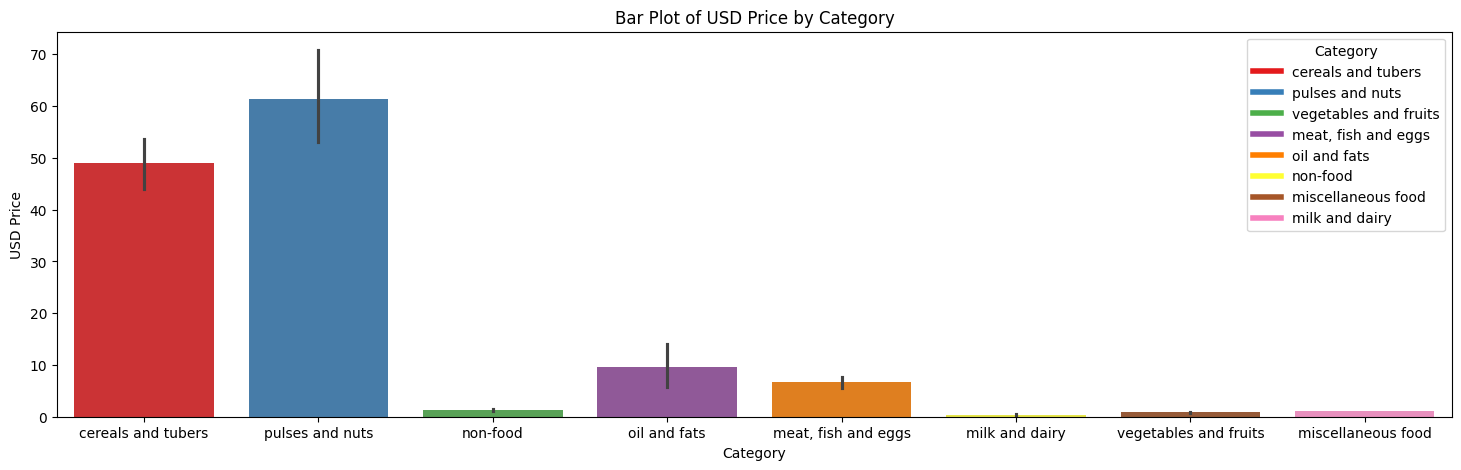

In [15]:
# Adjusting figure size (set this before creating the plot)
plt.figure(figsize=(18, 5))  # You can adjust the width and height as needed

# Choose a color palette with fewer colors
palette = sns.color_palette("Set1", len(data['Category'].unique()))

# Get the top 8 categories (you can adjust the number as needed)
top_categories = data['Category'].value_counts().index

# Filter the data to include only the top categories
filtered_data = data[data['Category'].isin(top_categories)]

# Creating the bar plot with different colors for each category
sns.barplot(x='Category', y='USD Price', hue='Category', data=filtered_data, palette=palette)

# Adding titles and labels
plt.title('Bar Plot of USD Price by Category')
plt.xlabel('Category')
plt.ylabel('USD Price')

# Creating a custom legend with colors
legend_handles = [plt.Line2D([0], [0], color=palette[i], lw=4) for i, _ in enumerate(top_categories)]
plt.legend(legend_handles, top_categories, title='Category')

# Show the plot
plt.show()

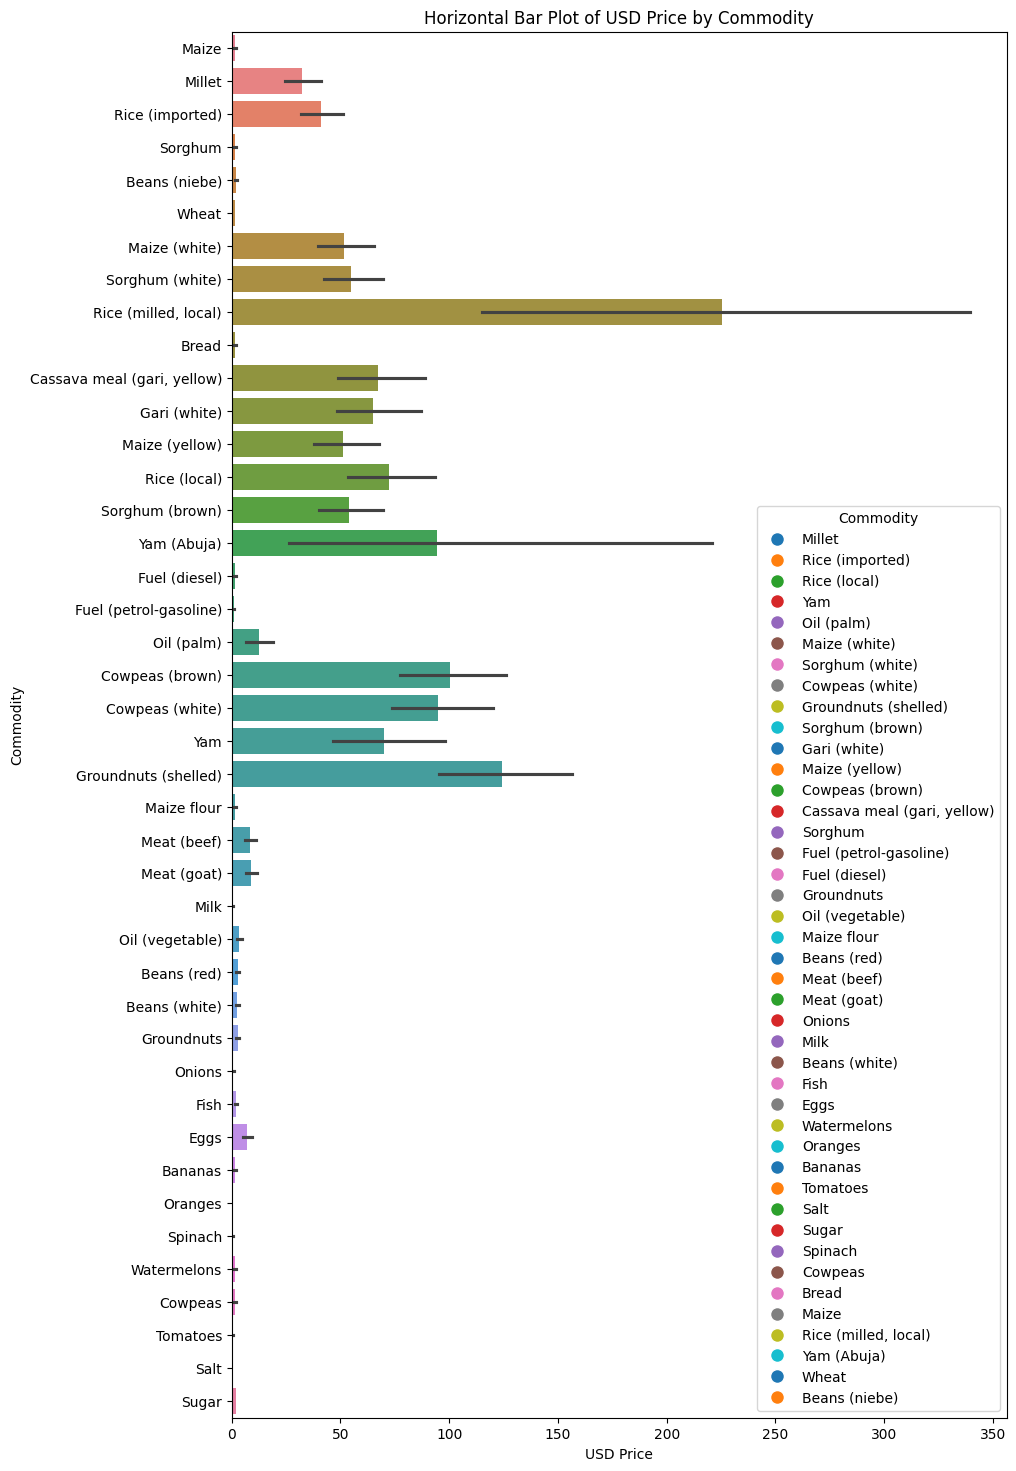

In [16]:
# Adjusting figure size (set this before creating the plot)
plt.figure(figsize=(10, 18))  # Swapping width and height for a horizontal plot

# Get the top categories
top_categories = data['Commodity'].value_counts().index

# Filter the data to include only the top categories
filtered_data = data[data['Commodity'].isin(top_categories)]

# Creating the horizontal bar plot with different colors for each category
sns.barplot(x='USD Price', y='Commodity', hue='Commodity', data=filtered_data)

# Adding titles and labels
plt.title('Horizontal Bar Plot of USD Price by Commodity')
plt.xlabel('USD Price')
plt.ylabel('Commodity')

# Creating a custom legend with colors
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[i % len(sns.color_palette())], markersize=10) for i, _ in enumerate(top_categories)]
plt.legend(legend_handles, top_categories, title='Commodity')

# Show the plot
plt.show()

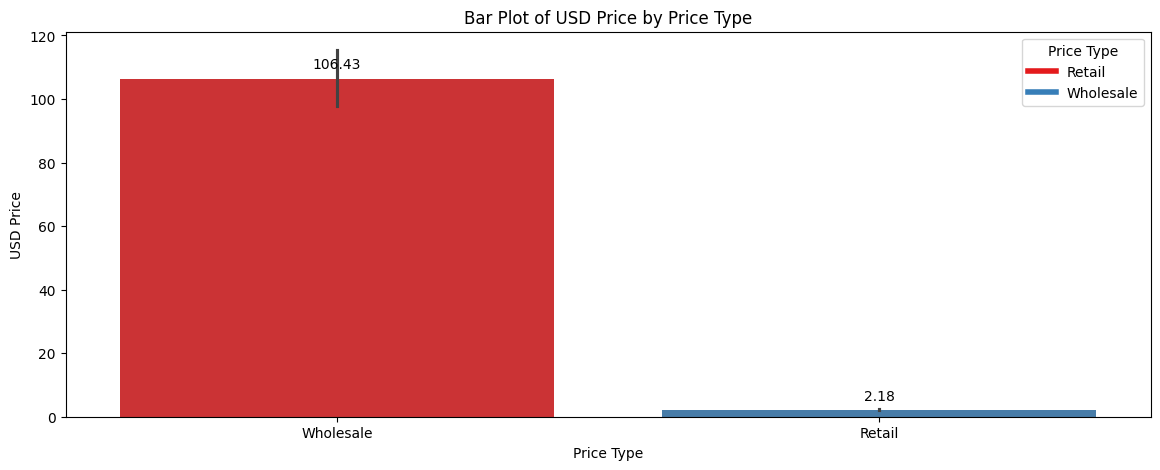

In [17]:

# Adjusting figure size (set this before creating the plot)
plt.figure(figsize=(14, 5))

# Choose a color palette with fewer colors
palette = sns.color_palette("Set1", len(data['Price Type'].unique()))

# Get Price Type 
top_price_type = data['Price Type'].value_counts().index

# Filter the data to include only the top Price Type
filtered_data = data[data['Price Type'].isin(top_price_type)]

# Creating the bar plot with different colors for each Price Type
ax = sns.barplot(x='Price Type', y='USD Price', hue='Price Type', data=filtered_data, palette=palette)

# Adding titles and labels
plt.title('Bar Plot of USD Price by Price Type')
plt.xlabel('Price Type')
plt.ylabel('USD Price')

# Creating a custom legend with colors
legend_handles = [plt.Line2D([0], [0], color=palette[i], lw=4) for i, _ in enumerate(top_price_type)]
plt.legend(legend_handles, top_price_type, title='Price Type')

# Adding annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

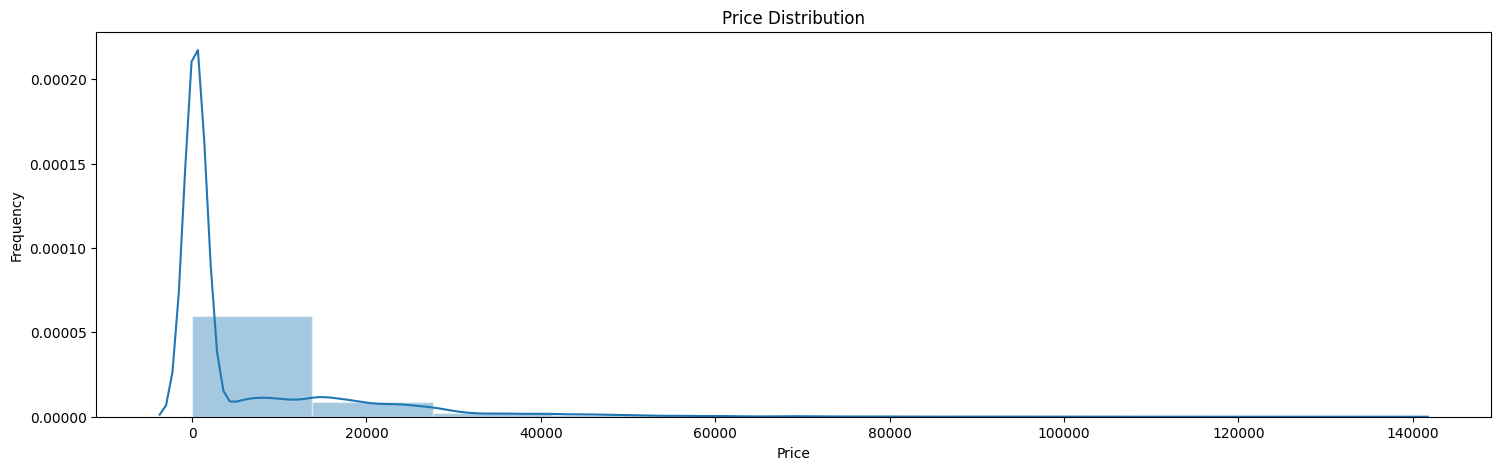

In [18]:
# Adjusting figure size (set this before creating the plot)
plt.figure(figsize=(18, 5))

# Creating a histogram with 20 bins
sns.histplot(data["Price"], kde=True, bins=10,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)

# Adding titles and labels
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

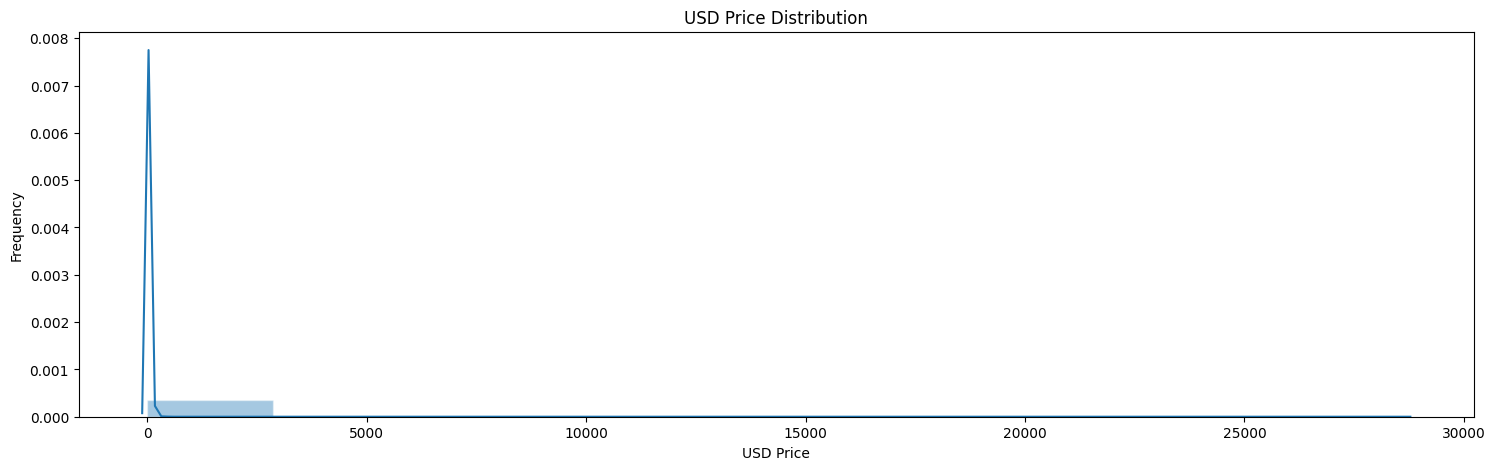

In [19]:
# Adjusting figure size (set this before creating the plot)
plt.figure(figsize=(18, 5))

# Creating a histogram with 20 bins
sns.histplot(data["USD Price"], kde=True, bins=10,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)

# Adding titles and labels
plt.title('USD Price Distribution')
plt.xlabel('USD Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

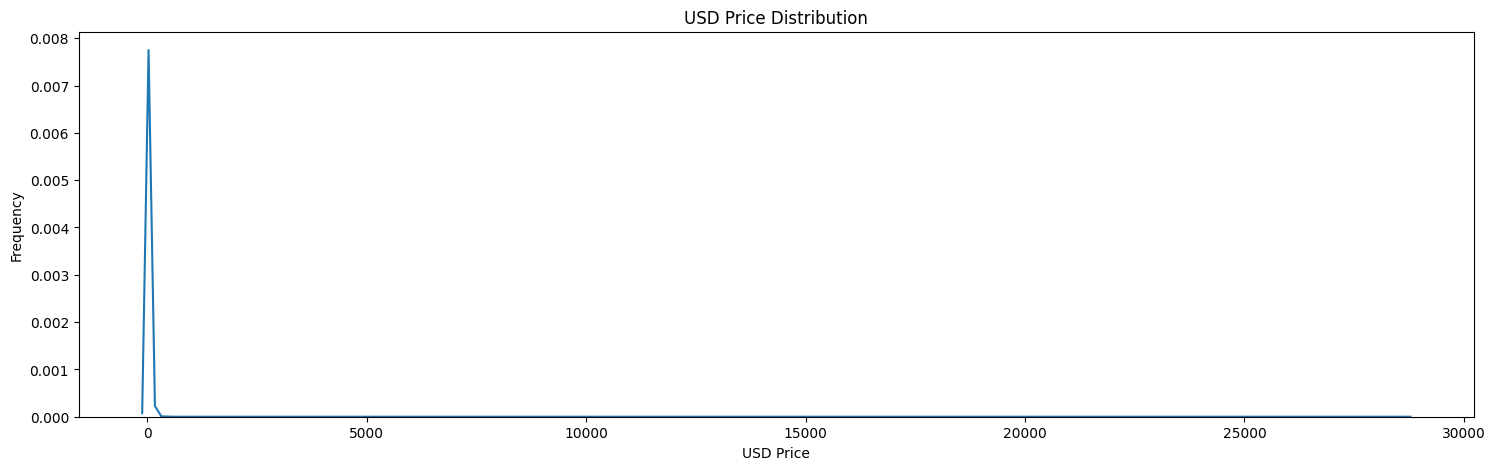

In [26]:
# Adjusting figure size (set this before creating the plot)
plt.figure(figsize=(18, 5))

sns.kdeplot(data["USD Price"])

# Adding titles and labels
plt.title('USD Price Distribution')
plt.xlabel('USD Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

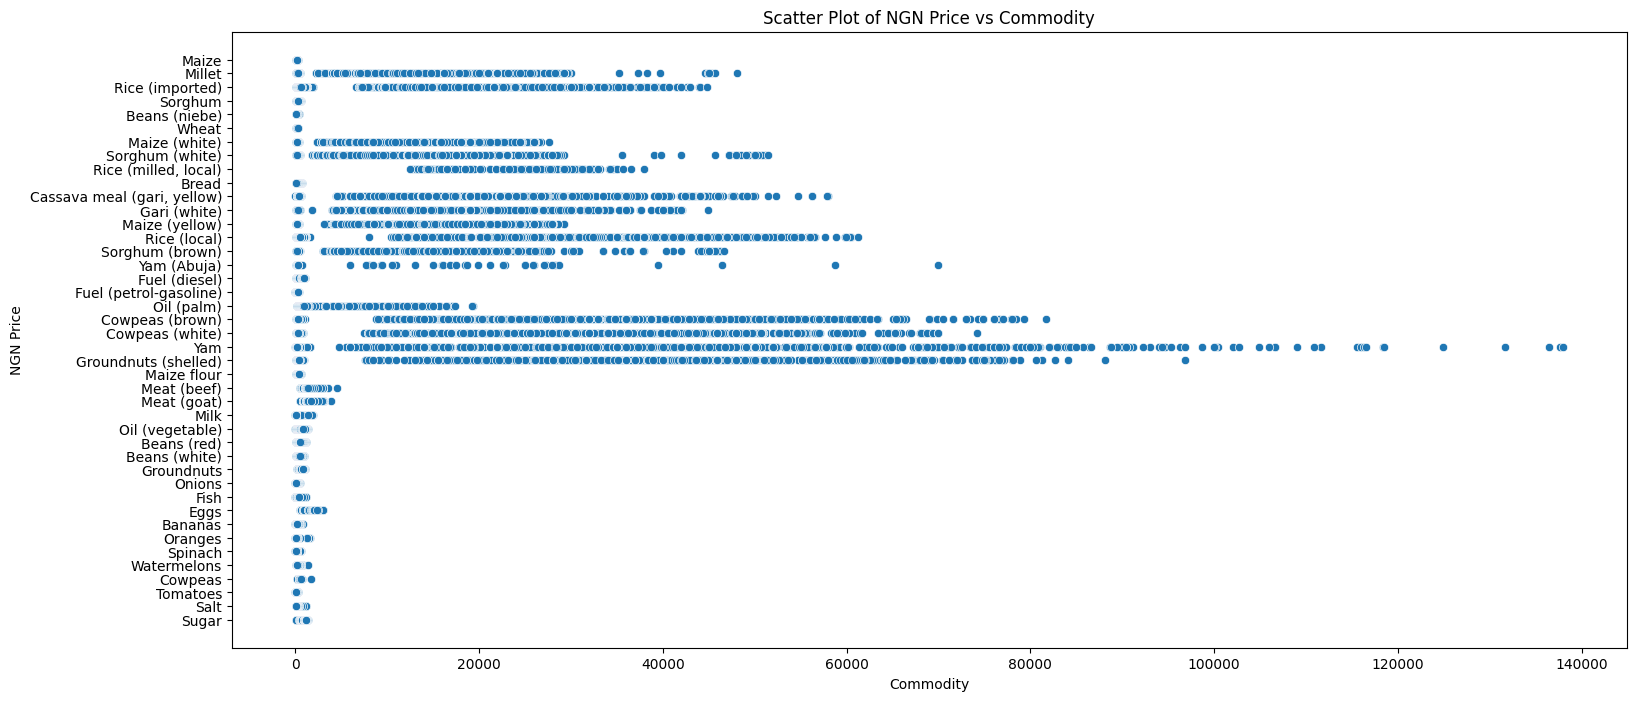

In [40]:
# Adjusting figure size (set this before creating the plot)
plt.figure(figsize=(18, 8))  # Swapping width and height for a horizontal plot
sns.scatterplot(x=data['Price'], y=data['Commodity'])
plt.title('Scatter Plot of NGN Price vs Commodity')
plt.xlabel('Commodity')
plt.ylabel('NGN Price')
plt.show()

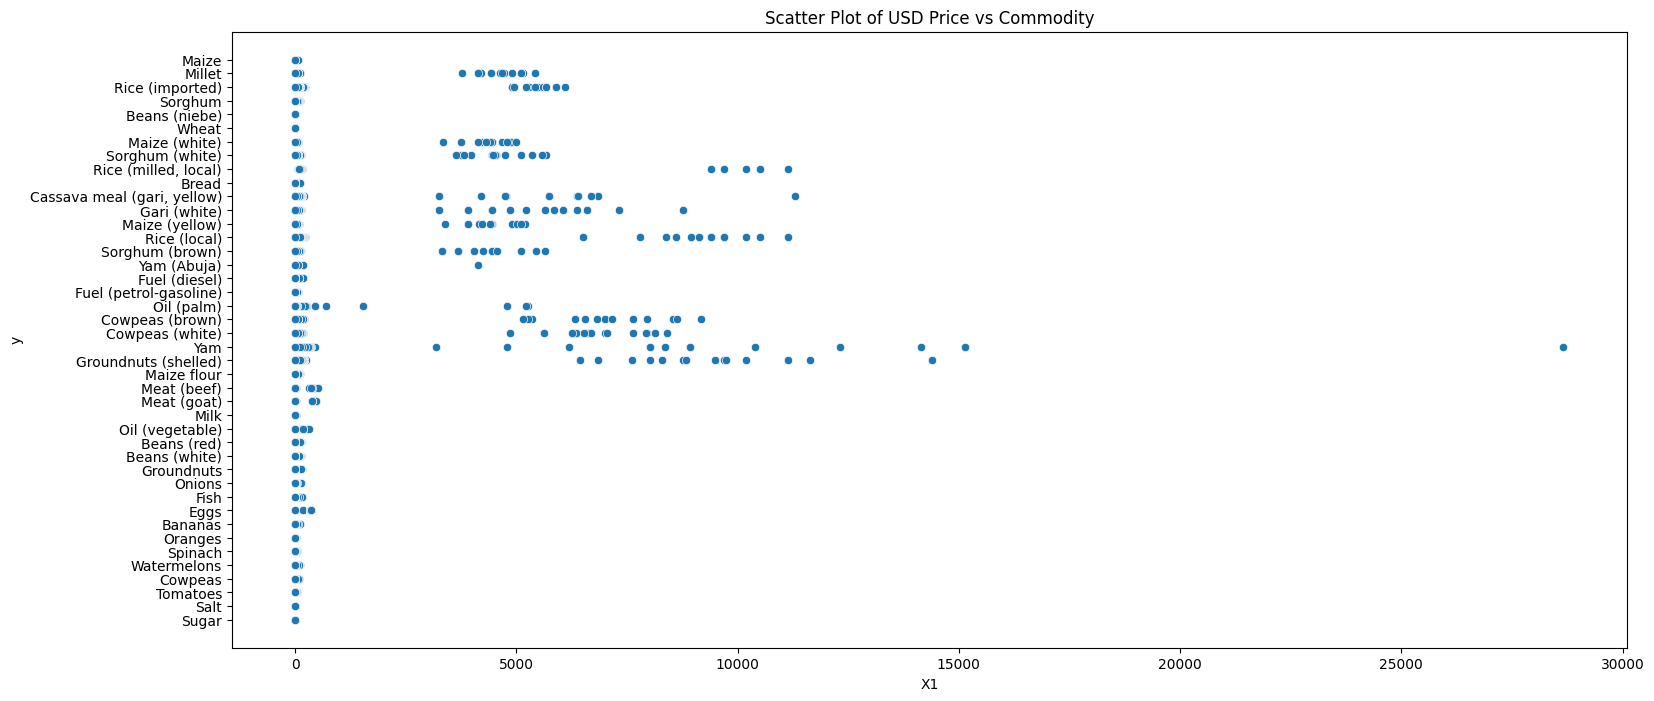

In [38]:
# Adjusting figure size (set this before creating the plot)
plt.figure(figsize=(18, 8))  # Swapping width and height for a horizontal plot
sns.scatterplot(x=data['USD Price'], y=data['Commodity'])
plt.title('Scatter Plot of USD Price vs Commodity')
plt.xlabel('X1')
plt.ylabel('y')
plt.show()

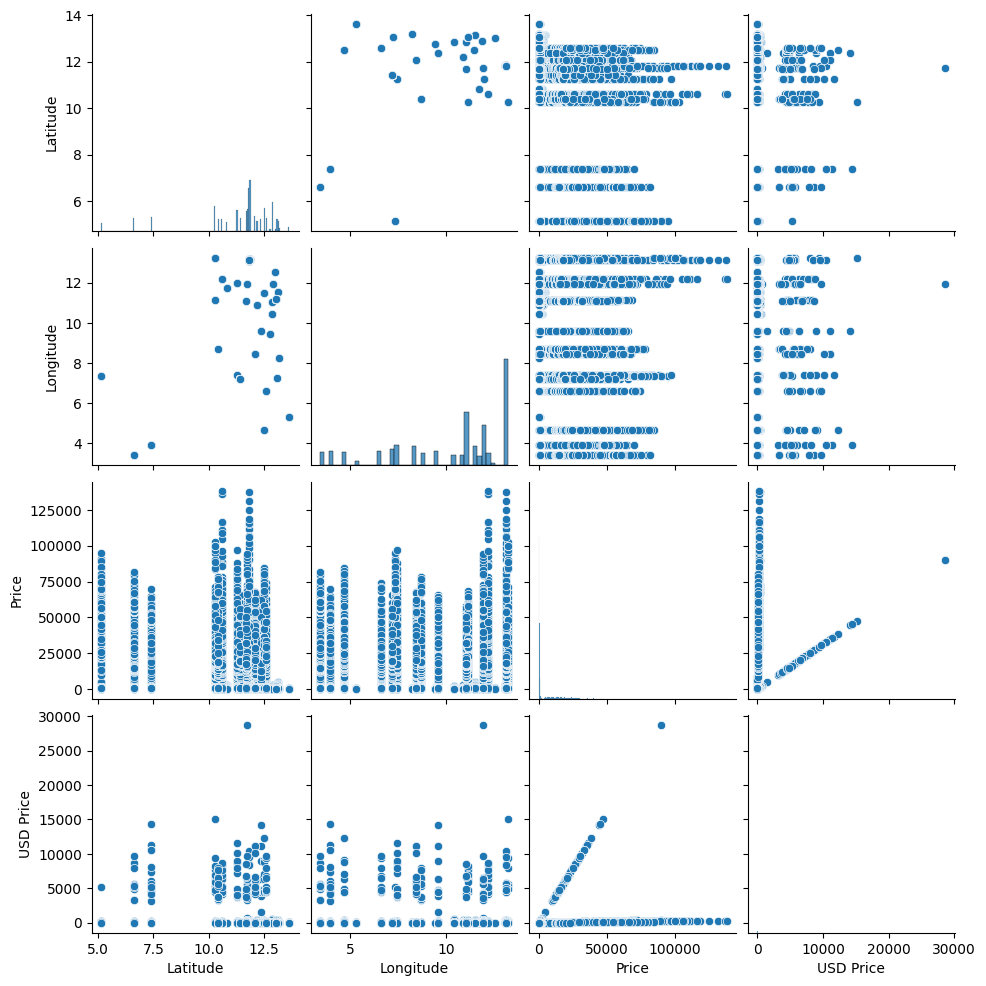

In [30]:
sns.pairplot(data)
plt.show()

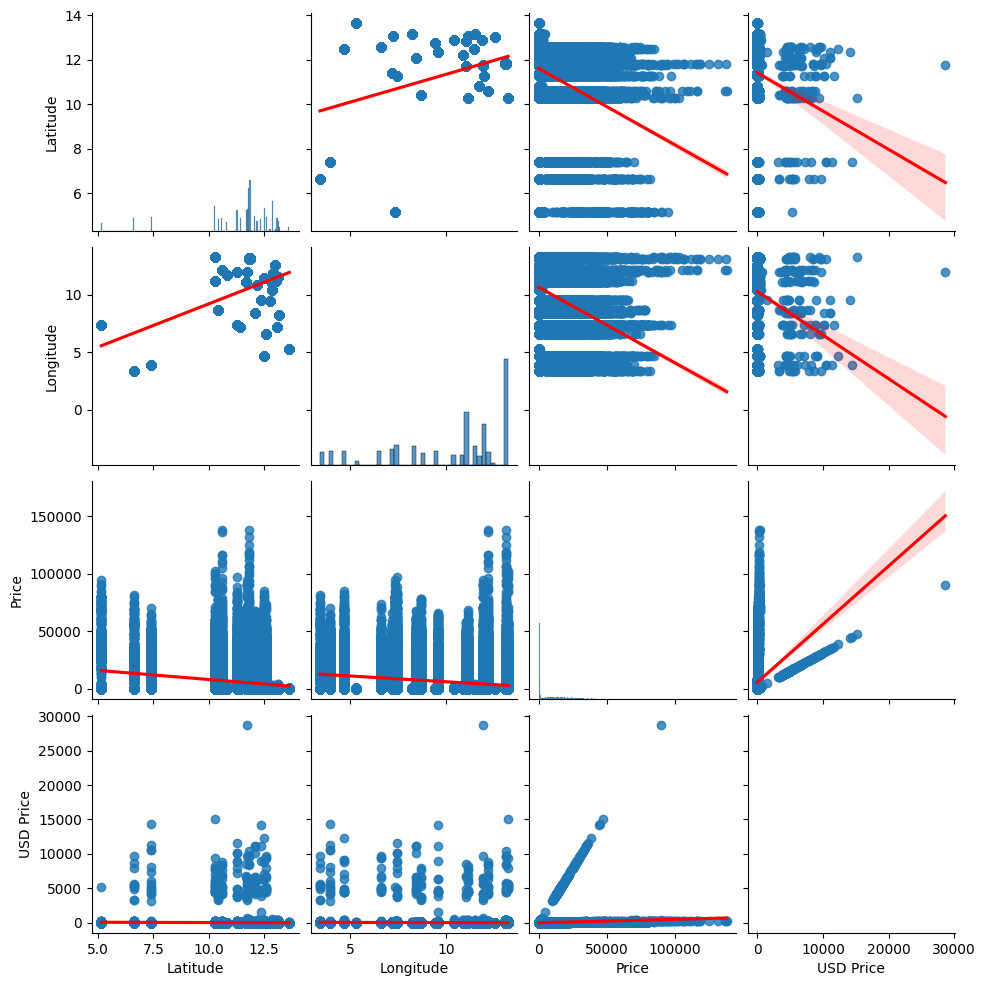

In [31]:
sns.pairplot(data, kind = 'reg' , plot_kws = {'line_kws':{'color': 'red'}})
plt.show()

###  Data Spliting